In [1]:
using BoundaryValueDiffEq, ForwardDiff

In [2]:
using DifferentialEquations
using OrdinaryDiffEq

In [3]:
using OrdinaryDiffEq

In [4]:
using Plots

In [5]:
potential(x) = x^4/4 - x^2/2;

In [6]:
#dev_potential(x) = 4*x^3 - 12*x - 2

In [7]:
#sec_potential(x) = 12*x^3 - 12

In [8]:
phi_const(k) = cosh(k) - 1

phi_const (generic function with 1 method)

In [9]:
#phi_deriv(k) = sinh(k)

In [10]:
x1 = -1.0
x2 = 0.0;

In [11]:
#function euler_lagrange!(du, u, p, t)
#    du[1] = -dev_potential(u[1]) + u[2] + phi_deriv(u[2])
#    du[2] =  sec_potential(u[1])*u[2]
#end

In [30]:
function euler_lagrange!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + 0.01*ForwardDiff.derivative(phi_const, u[2]*10)
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

function euler_l!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2]
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

euler_l! (generic function with 1 method)

In [31]:
function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - x1 # the solution at the beginning of the time span should be -pi/2
    residual[2] = u[end][1] - x2 # the solution at the end of the time span should be pi/2
end

bc2! (generic function with 1 method)

In [32]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [33]:
u0 = [x1, 0.0] # the initial guess

2-element Vector{Float64}:
 -1.0
  0.0

In [34]:
bvp3 = BVProblem(euler_lagrange!, bc2!, u0, tspan)



BVProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 -1.0
  0.0

In [35]:
sol3 = solve(bvp3, Shooting(Vern7()))


┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.638527361041539. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.638527814724757. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.636892418662401. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.63522766424549. Aborting. There is either an error in your model specific

┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.6341791262371075. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.634179126237048. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.63417912623702. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=5.634179126237005. Aborting. There is either an error in your model specifi

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 10-element Vector{Float64}:
  0.0
  0.3837068946386088
  1.1186783657583683
  2.1309823827055334
  3.2756638772384763
  4.8264702048609545
  6.6732447017715995
  8.267833268034323
  9.557180471292687
 10.0
u: 10-element Vector{Vector{Float64}}:
 [-1.002904092314494, 1.0995936267363604e-11]
 [-1.0013449733957418, 2.379813039857412e-11]
 [-1.0003087687764691, 1.0381971498268506e-10]
 [-1.000040669306557, 7.868566069931182e-10]
 [-1.000004079516227, 7.765484815235866e-9]
 [-1.0000000554636166, 1.7248193934890646e-7]
 [-0.9999980923882751, 6.905016889549618e-6]
 [-0.9999539783768063, 0.00016733913505333846]
 [-0.9993940770131534, 0.00220133414583062]
 [-0.9985327988242013, 0.005323421534729608]

In [36]:
u0 = [x1, 1]
bvp4 = BVProblem(euler_l!, bc2!, u0, tspan)
sol4 = solve(bvp4, Shooting(Vern7()))

┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=2.609225450762714. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=2.609244768733842. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=2.6092061330246765. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=2.609212764264708. Aborting. There is either an error in your model specif

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 16-element Vector{Float64}:
  0.0
  0.17152732428642598
  0.4836846106609677
  0.8632439177363713
  1.2964906769887832
  1.8033380063932447
  2.434327706680423
  3.00779042525962
  3.609939924294251
  4.219744847590454
  5.070957264726314
  5.731464811828377
  6.6215277798144205
  7.560322896358403
  8.845752110856038
 10.0
u: 16-element Vector{Vector{Float64}}:
 [-1.0, 0.004399111397729725]
 [-0.9992305700590907, 0.006196999413524787]
 [-0.9975263249154703, 0.011535618558926628]
 [-0.9940399378555138, 0.02442000972629349]
 [-0.9856115597213293, 0.056659104814129675]
 [-0.9615865913225636, 0.14504686861565047]
 [-0.8810875977562744, 0.39422172212872847]
 [-0.7240776070392849, 0.6889303859208656]
 [-0.49840429061040076, 0.7492048737526341]
 [-0.29820967629507245, 0.5433944704165916]
 [-0.13219249593637336, 0.2597792651441716]
 [-0.06872078791333094, 0.13681973027139407]
 [-0.028246900076193848, 0.056514595229049

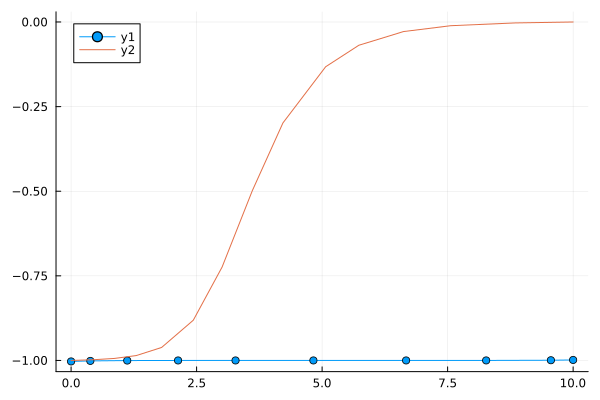

In [37]:
plot(sol3.t, map(x-> x[1], sol3.u), marker = :circle)
plot!(sol4.t, map(x-> x[1], sol4.u))

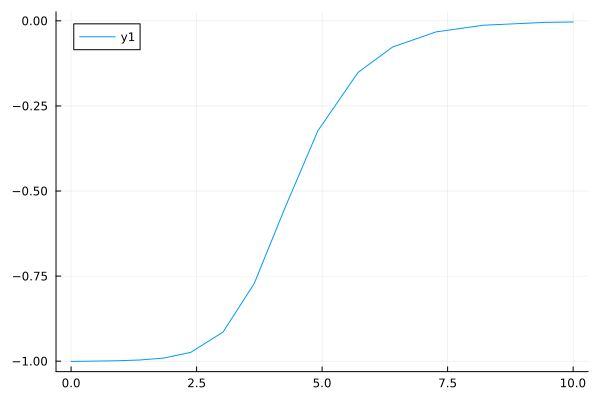

In [70]:
#plot(sol2.t, map(x-> x[1], sol2.u))
plot(sol3.t, map(x-> x[1], sol3.u))